In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

# import species_data.json

with open('../../species_data_baseline.json') as f:
    data = json.load(f)

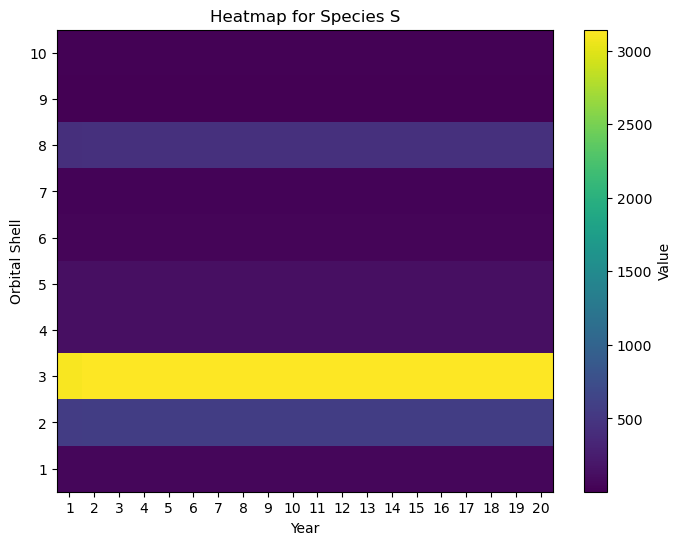

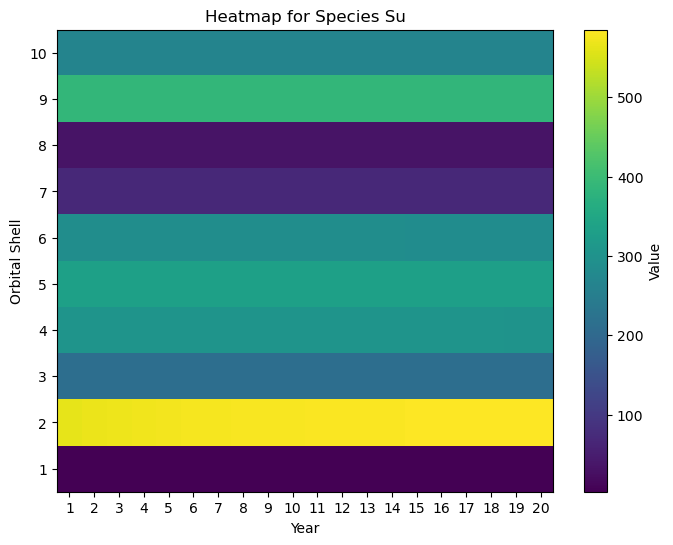

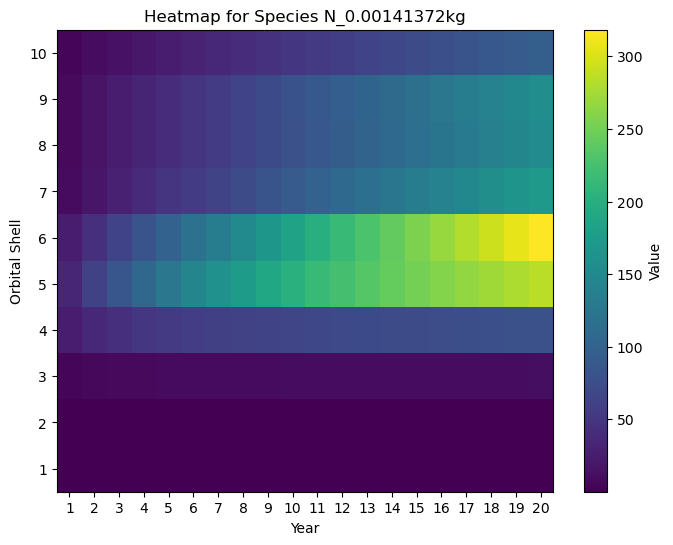

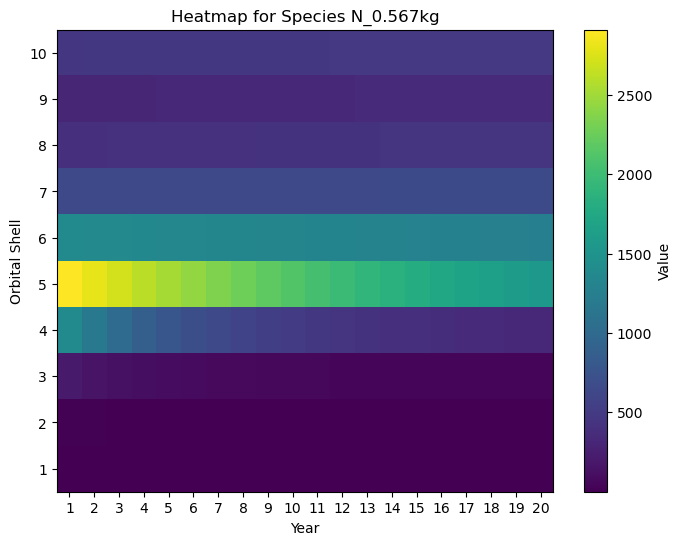

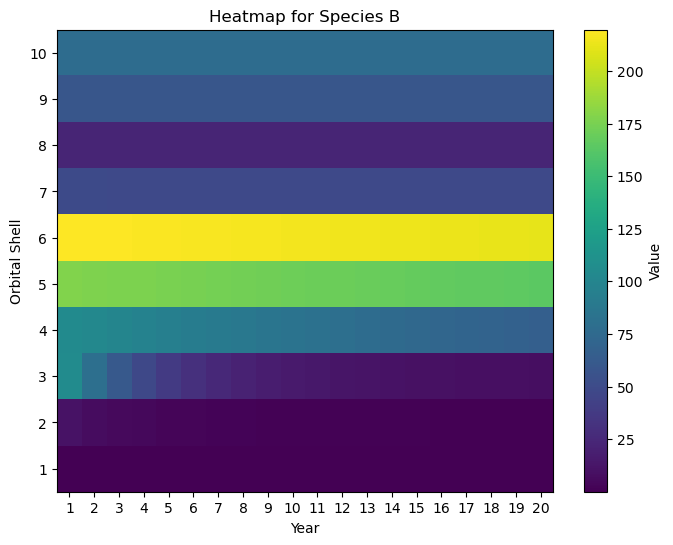

In [12]:
# Convert the JSON data back into a dictionary with NumPy arrays
species_data = {sp: np.array(data) for sp, data in data.items()}

# Plot heatmaps for each species
for sp, data in species_data.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(data.T, aspect='auto', cmap='viridis', origin='lower')  # Transpose to match the described format
    plt.colorbar(label='Value')
    plt.title(f'Heatmap for Species {sp}')
    plt.xlabel('Year')
    plt.ylabel('Orbital Shell')
    plt.xticks(ticks=range(data.shape[0]), labels=range(1, data.shape[0] + 1))
    plt.yticks(ticks=range(data.shape[1]), labels=range(1, data.shape[1] + 1))
    plt.show()